In [ ]:
!pip install numpy==1.23.5

In [ ]:
import random
import os

from time import sleep

import gym
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output

Esta aula foi desenvolvida com esta versão da biblioteca `gym`:

In [ ]:
gym.__version__

'0.25.2'

## Aprendizagem por reforço com Q-Learning

Neste exercícios, você vai utilizar o ambiente [CliffWalking](https://www.gymlibrary.dev/environments/toy_text/cliff_walking).

In [ ]:
env = gym.make("CliffWalking-v0")

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Resete o ambiente.

In [ ]:
env.reset()

36

Este ambiente prevê que o personagem sempre retorna à célula 36 quando o ambiente é resetado.

Renderize o ambiente, passando o argumento `mode="rgb_array"`. Para visualizar a figura, a chamada para `render` deve ser passada para a função `plt.imshow`.

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


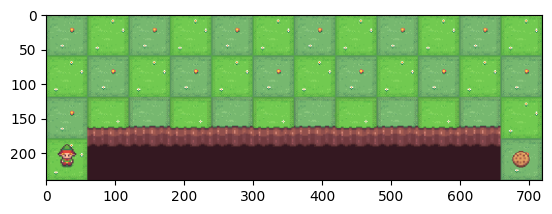

In [ ]:
plt.imshow(env.render(mode='rgb_array'))

Exiba o espaço de ações.

In [ ]:
env.action_space

Discrete(4)

De acordo com a documentação:

> Existem 4 ações discretas determinísticas:
>
> 0: mover para cima
>
> 1: mover para a direita
>
> 2: mover para baixo
>
> 3: mover para a esquerda

Exiba o espaço de observações.

In [ ]:
env.observation_space

Discrete(48)

De acordo com a documentação:

> O tabuleiro é uma matriz 4x12.

Isso fica evidente pela figura.

Exiba os estados possíveis junto com suas ações, probabilidades, novos estados, recompensas e status.

In [ ]:
env.P

{0: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 12, -1, False)],
  3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 1, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 13, -1, False)],
  3: [(1.0, 0, -1, False)]},
 2: {0: [(1.0, 2, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 14, -1, False)],
  3: [(1.0, 1, -1, False)]},
 3: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 15, -1, False)],
  3: [(1.0, 2, -1, False)]},
 4: {0: [(1.0, 4, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 16, -1, False)],
  3: [(1.0, 3, -1, False)]},
 5: {0: [(1.0, 5, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 17, -1, False)],
  3: [(1.0, 4, -1, False)]},
 6: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 7, -1, False)],
  2: [(1.0, 18, -1, False)],
  3: [(1.0, 5, -1, False)]},
 7: {0: [(1.0, 7, -1, False)],
  1: [(1.0, 8, -1, False)],
  2: [(1.0, 19, -1, False)],
  3: [(1.0, 6, -1, False)]},
 8: {0: [(1.0, 8, -1, False)],
  1: [(1.0, 9, -1, False)],
  2: 

Observe que as recompensas são iguais a $-1$ ou $-100$. De acordo com a documentação:

> Cada passo resulta em recompensa $-1$, e um passo no abismo resulta em recompensa $-100$.

Inicialize a tabela Q para armazenar a memória do treinamento, e exiba seu `shape`.

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
q_table.shape

(48, 4)

Agora, pode implementar o algoritmo Q-Learning, utilizando os mesmos parâmetros `alpha`, `gamma` e `epsilon` apresentados em aula. Como este ambiente é mais simples, pode repetir o treinamento por apenas 1000 episódios. Lembre-se de adequar o valor da recompensa na parte do script que contabiliza uma penalidade.

In [ ]:
alpha = 0.1
gamma = 0.6
epsilon = 0.1

for i in range(1000):
    state = env.reset()

    penalties, reward = 0, 0

    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)

        q_old = q_table[state, action]
        next_max = np.max(q_table[next_state])

        q_new = (1 - alpha) * q_old + alpha * (reward + gamma * next_max)
        q_table[state, action] = q_new

        if reward == -100:
            penalties += 1

        state = next_state

    if i % 100 == 0:
      clear_output(wait=True)
      print(f"Episode: {i}")

print('Treinamento concluído')

Episode: 900
Treinamento concluído


Resete e renderize o ambiente de novo.

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


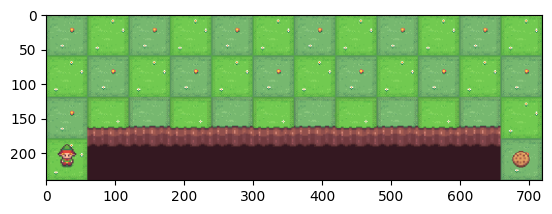

In [ ]:
env.reset()
plt.imshow(env.render(mode='rgb_array'))

Agora dê um passo para a direita e renderize o ambiente.

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


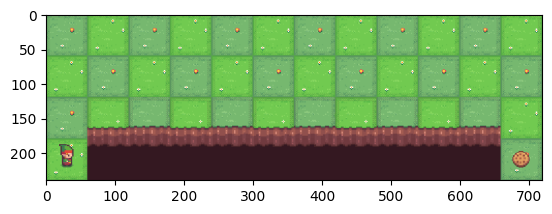

In [ ]:
env.step(1)
plt.imshow(env.render(mode='rgb_array'))

Como na direita existe o precipício, este ambiente foi configurado para que, neste caso, o personagem não saia do lugar (mas a recompensa recebida é $-100$).

Repita com um passo para cima.

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


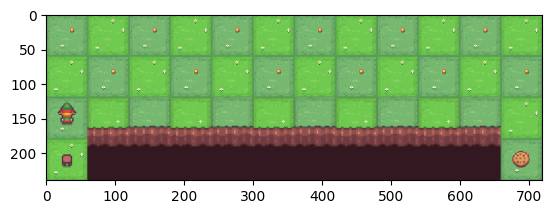

In [ ]:
env.step(0)
plt.imshow(env.render(mode='rgb_array'))

Agora sim o personagem se moveu.

Para verificar o resultado do treinamento, simule os passos no ambiente, fazendo uso da `q_table`. Como o personagem inicia sempre da mesma célula, não é necessário simular mais do que 1 episódio.

In [ ]:
total_penalties = 0
episodes = 1
frames = []

for _ in range(episodes):
    state = env.reset()
    done = False

    while not done:
      action = np.argmax(q_table[state])
      state, reward, done, info = env.step(action)
      frames.append({
          'frame': env.render(mode='rgb_array'),
          'state': state,
          'action': action,
          'reward': reward
      })
      if reward == -100:
          total_penalties += 1

print('Episódios', episodes)
print('Penalidades', total_penalties)

Episódios 1
Penalidades 0


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Exiba os frames, admitindo 1 segundo de intervalo entre as exibições.

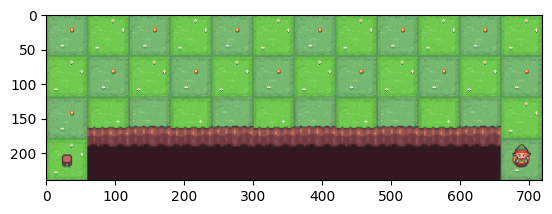

State 47
Action 2
Reward -1


In [ ]:
for frame in frames:
    clear_output(wait=True)
    plt.imshow(frame['frame'])
    plt.show()
    print('State', frame['state'])
    print('Action', frame['action'])
    print('Reward', frame['reward'])
    sleep(1)